# Backends in Qiskit

https://quantumcomputing.stackexchange.com/questions/28833/what-is-the-difference-between-using-qiskit-aersimulator-backends-and-just-calli

In Qiskit, to execute a QuantumCircuit you need a backend which can be an actual quantum computer as well as a simulator. And to get a backend you need a Provider.

Qiskit comes with several providers:

Provider: https://docs.quantum.ibm.com/api/qiskit/providers 

**Basic Aer Provider**: a set of python-based simulators.
### Problematic

**Aer Provider**: a variety of high-performance simulator backends for a variety of simulation methods.

In [ ]:
from qiskit_aer import AerProvider
provider = AerProvider()

**Fake Provider**: 
a set of backends built to mimic the behaviors of IBM Quantum systems using system snapshots that contain important information about the quantum system such as coupling map, basis gates, qubit properties. \
https://docs.quantum.ibm.com/api/qiskit/providers_fake_provider

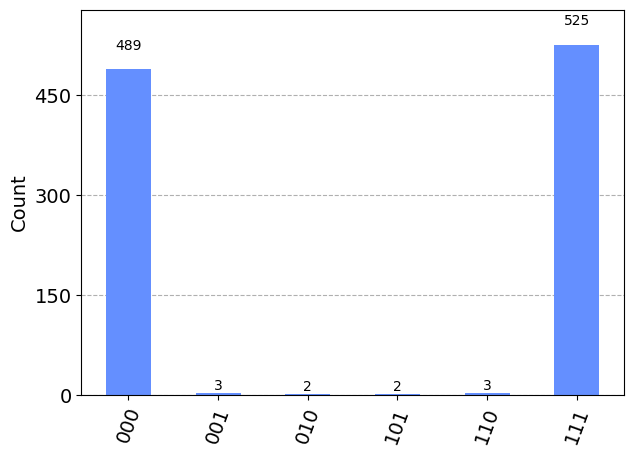

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
 
# Generate a 5-qubit simulated backend
backend = GenericBackendV2(num_qubits=5)
 
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl')
 
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')
 
# Run the transpiled circuit using the simulated backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)